In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
income = pd.read_csv('resources/income.csv')
income = income.iloc[3:]
income.columns = income.iloc[0]
income = income.iloc[1:]
income

3,FIPS_Code,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
4,00000,US,United States,NaN,NaN,NaN,"142,601,576","136,904,853","5,696,723",4.0,...,"163,140,305","157,154,185","5,986,120",3.7,"160,611,064","147,677,360","12,933,704",8.1,"65,712",NaN
5,01000,AL,Alabama,NaN,NaN,NaN,"2,147,173","2,047,731","99,442",4.6,...,"2,237,278","2,169,395","67,883",3.0,"2,230,118","2,099,062","131,056",5.9,"51,771",100.0
6,01001,AL,"Autauga County, AL",2,2,1,"21,861","20,971",890,4.1,...,"26,281","25,561",720,2.7,"25,838","24,576","1,262",4.9,"58,233",112.5
7,01003,AL,"Baldwin County, AL",3,2,1,"69,979","67,370","2,609",3.7,...,"97,424","94,713","2,711",2.8,"96,763","91,338","5,425",5.6,"59,871",115.6
8,01005,AL,"Barbour County, AL",6,6,0,"11,449","10,812",637,5.6,...,"8,502","8,177",325,3.8,"8,587","7,982",605,7.0,"35,972",69.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,72145,PR,"Vega Baja Municipio, PR",1,1,1,"19,805","17,607","2,198",11.1,...,"13,172","11,910","1,262",9.6,NaN,NaN,NaN,NaN,NaN,NaN
3275,72147,PR,"Vieques Municipio, PR",7,12,0,"2,441","2,120",321,13.2,...,"2,616","2,433",183,7.0,NaN,NaN,NaN,NaN,NaN,NaN
3276,72149,PR,"Villalba Municipio, PR",2,2,1,"7,636","6,648",988,12.9,...,"7,492","6,307","1,185",15.8,NaN,NaN,NaN,NaN,NaN,NaN
3277,72151,PR,"Yabucoa Municipio, PR",1,1,1,"10,613","9,005","1,608",15.2,...,"8,840","7,685","1,155",13.1,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
covid = pd.read_csv('resources/covid.csv')
covid

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
2161172,2022-01-28,Sweetwater,Wyoming,56037.0,10133,115.0
2161173,2022-01-28,Teton,Wyoming,56039.0,9272,15.0
2161174,2022-01-28,Uinta,Wyoming,56041.0,5273,34.0
2161175,2022-01-28,Washakie,Wyoming,56043.0,2150,41.0


In [ ]:
income.dropna(subset=['Median_Household_Income_2019'], inplace=True)
income['Median_Household_Income_2019'] = income['Median_Household_Income_2019'].str.replace(',','').astype(int)

In [73]:
#income.rename(columns={'FIPS': 'fips'}, inplace=True)
#income.set_index('fips', inplace=True)
income_data = income[['Median_Household_Income_2019', 'Area_name']].reset_index()
income_data['fips'] = income_data['fips'].astype(int)
income_data

3,fips,Median_Household_Income_2019,Area_name
0,0,65712,United States
1,1000,51771,Alabama
2,1001,58233,"Autauga County, AL"
3,1003,59871,"Baldwin County, AL"
4,1005,35972,"Barbour County, AL"
...,...,...,...
3188,56037,80639,"Sweetwater County, WY"
3189,56039,98837,"Teton County, WY"
3190,56041,70756,"Uinta County, WY"
3191,56043,55122,"Washakie County, WY"


In [71]:
covid_sum = covid.groupby('fips').sum().reset_index()
covid_sum['fips'] = covid_sum['fips'].astype(int)
covid_sum

,fips,cases,deaths
0,1001,3588350,52008.0
1,1003,12153712,165696.0
2,1005,1285512,26686.0
3,1007,1438399,30694.0
4,1009,3547303,61975.0
...,...,...,...
3215,72151,654986,0.0
3216,72153,636148,0.0
3217,78010,971359,8276.0
3218,78020,125186,906.0


In [74]:
data = pd.merge(income_data, covid_sum, on='fips')
data

,fips,Median_Household_Income_2019,Area_name,cases,deaths
0,1001,58233,"Autauga County, AL",3588350,52008.0
1,1003,59871,"Baldwin County, AL",12153712,165696.0
2,1005,35972,"Barbour County, AL",1285512,26686.0
3,1007,47918,"Bibb County, AL",1438399,30694.0
4,1009,52902,"Blount County, AL",3547303,61975.0
...,...,...,...,...,...
3127,56037,80639,"Sweetwater County, WY",2343402,23007.0
3128,56039,98837,"Teton County, WY",1875986,4524.0
3129,56041,70756,"Uinta County, WY",1227782,7658.0
3130,56043,55122,"Washakie County, WY",512472,12685.0


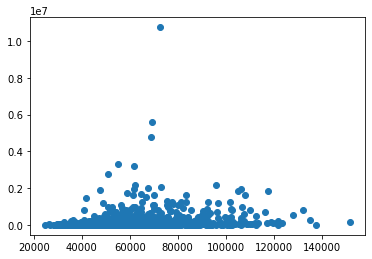

In [79]:
xs = data['Median_Household_Income_2019']
ys = data['deaths']

plt.scatter(xs, ys)
plt.show()